In [ ]:
!pip install selenium

#### selenium 
- 웹 어플리케이션을 테스트하기 위한 라이브러리 
- python code를 이용하여 웹 브라우져를 제어 

In [2]:
from selenium import webdriver

In [3]:
# 웹 브라우져 오픈 (해당 웹 브라우져를 변수로 지정)
driver = webdriver.Chrome()

In [4]:
# 웹 브라우져에서 naver 접속
driver.get('https://www.naver.com')

#### selenium에서 tag에 접근
- find_element()
    - html문서에서 특정 태그를 검색 -> 그 중에 첫번째 태그를 선택 
    - BeautifulSoup의 find() 흡사
- find_elements()
    - html문서에서 특정 태그를 모두 검색
    - BeautifulSoup의 find_all() 흡사

In [5]:
# By : 태그에 접근하기 편한 기능을 가지고 있는 class
from selenium.webdriver.common.by import By
# Keys : 키보드의 이벤트를 담당하는 class
from selenium.webdriver.common.keys import Keys

In [6]:
# 네이버 메인 화면에서 검색어를 입력하는 input 태그를 선택
# id가 query인 태그 
search_element = driver.find_element(By.ID, 'query')

In [7]:
search_element

<selenium.webdriver.remote.webelement.WebElement (session="90845fc9cbad4b71286a7cab84ab15cd", element="f.1A9726BE736A3FDEB5C55A89C262C695.d.30B233B00956A6412E9042D71B6C2E2A.e.5")>

In [8]:
# 검색어 창에 특정 단어를 입력
search_element.send_keys("비타500")

In [10]:
# 검색어 창에서 ENTER 이벤트 발생
search_element.send_keys(Keys.ENTER)

In [12]:
# id가 lnb 태그를 선택 
lnb_element = driver.find_element(
    By.ID, 'lnb'
)

In [13]:
# 쇼핑 탭의 element를 선택
# div 태그 중 role 속성의 값이 tablist인 
len(
    lnb_element.find_elements(
        By.CSS_SELECTOR, 
        'div[role="tablist"]'
    )
)

1

In [14]:
menu_element = lnb_element.find_element(
    By.CSS_SELECTOR, 
    'div[role="tablist"]'
)

In [16]:
# 메뉴 탭에서 쇼핑 탭 태그를 선택
menu_element.find_element(
    By.LINK_TEXT, 
    '쇼핑'
).click()

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/127.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="비타500 : 네이버 검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'비타500\'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="\'비타500\'의 네이버 검색 결과입니다."> <title>비타500 : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_240801.css"> 
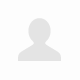
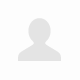

In [17]:
# 현재 driver 변수에 html 코드를 로드 
driver.page_source

In [18]:
from bs4 import BeautifulSoup as bs

In [19]:
soup = bs(driver.page_source, 'html.parser')

In [20]:
soup.title

<title>비타500 : 네이버 검색</title>

In [21]:
# driver에 존재하고 있는 모든 탭의 주소를 출력 
driver.window_handles

['1A9726BE736A3FDEB5C55A89C262C695', 'BCA655391BE59297B681D2F13EA65AAE']

In [22]:
# driver에서 탭을 이동 
driver.switch_to.window(driver.window_handles[1])

In [23]:
bs(driver.page_source, 'html.parser').title

<title>비타500 : 네이버 쇼핑</title>

In [24]:
import time

In [25]:
# driver에서 스크롤 가장 하단으로 내린다. 
try : 
    last_scroll = driver.execute_script("return document.body.scrollHeight")

    # 반복문 사용 (반복 횟수가 불분명할때)
    while True:
        # 스크롤을 가장 마지막으로 이동 
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # 잠시 대기하는 코드 
        time.sleep(2)

        # 스크롤을 내린뒤 다시한번 화면의 높이를 측정 
        new_scroll = driver.execute_script("return document.body.scrollHeight")

        # last_scroll과 new_scroll 비교
        if new_scroll == last_scroll:
            # 반복문을 종료
            break
        else:
            last_scroll = new_scroll
except Exception as e:
    print("Error code:", e)